### Force field - one component

#### Small molecule

Reading data	1.92 s
Preparing input	31.19 s
13.477963851284
-1366.2490060634868
58221.17880243189
-1347071.7187593363
17964537.057092495
-128631804.19455068
273044335.56405354
2327341359.942639
-11314827915.869982
-44382294455.066925
160260650095.6023
3275359694072.6577
-25739600764818.355
73282657896749.53
-76533309674952.2


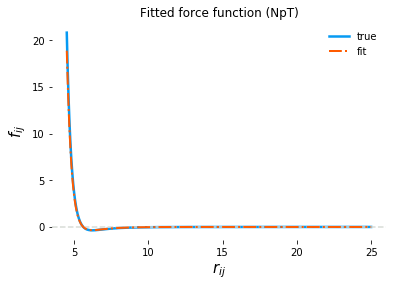

In [2]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component
from multiprocessing import freeze_support

def target_function(x):
    #return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)
    return 24 * 0.75 / x * (2 * (5) ** 12 * x ** (-12) - (5) ** 6 * x ** (-6))

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_npt.out"
params = range(0, -15, -1)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': 2/500, 'NpT': 3/500}
steps = 3
timesteps_in_fit = 500

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=18,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')


proc.prepare_training_data()
proc.regress(method='bayesian')

x = np.linspace(4.5, 25, 1000)
y_fit = proc.predict(x)[0]
y = target_function(x)
plot_1component(x, y_fit, y)
for w in proc.weights:
    print(w / 4.184e-4)

#### Heavy molecule

Reading data	2.82 s
Preparing input	16.54 s


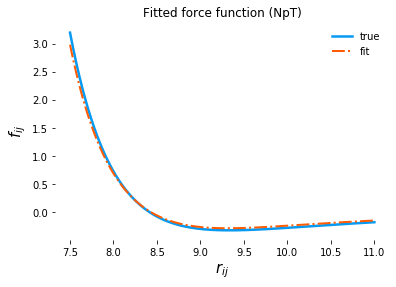

In [9]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

x = np.linspace(7.5, 11, 1000)

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_heavy_npt.out"
params = range(0, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': 3/400, 'NpT': 5/500}
steps = 5
timesteps_in_fit = 500

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit)

proc.prepare_training_data()
proc.regress(method='bayesian')

y_fit = proc.predict(x)[0]
y = target_function(x)
plot_1component(x, y_fit, y)

### Force field - multi-component

Reading data	2.46 s
Preparing input	292.28 s


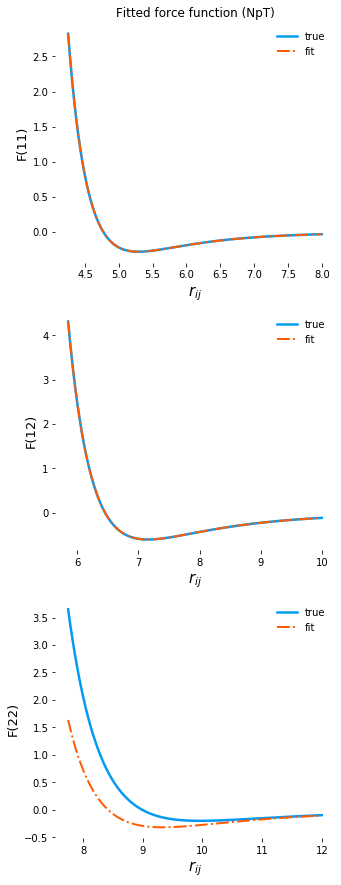

In [10]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_2component


X = [np.linspace(4.25, 8, 1000), np.linspace(5.85, 10, 1000), np.linspace(7.75, 12, 1000)]

def target_function0(x):
    return 24 * 0.50 / x * (2 * (4.25/x) ** 12 - (4.25/x) ** 6)

def target_function1(x):
    return 24 * 1.45 / x * (2 * (5.75/x) ** 12 - (5.75/x) ** 6)

def target_function2(x):
    return 24 * 1.00 / x * (2 * (7.75/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/lj_test/two_component_files/lj_trajectory_match_npt.out"
params = range(0, -14, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': 2/75, 'NpT': 2/150}
steps = 2
timesteps_in_fit = 150

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit)

proc.prepare_training_data()
proc.regress(method='bayesian')

Y = [target_function0(X[0]), target_function1(X[1]), target_function2(X[2])]
Y_fit = [proc.predict(X[0])[0], proc.predict(X[1])[1], proc.predict(X[2])[2]]
plot_2component(X, Y_fit, Y)